<a href="https://colab.research.google.com/github/ugrcnylmz/Assingment/blob/main/DL_Assignment_2.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

___

<p style="text-align: center;"><img src="https://docs.google.com/uc?id=1lY0Uj5R04yMY3-ZppPWxqCr5pvBLYPnV" class="img-fluid" alt="CLRSWY"></p>

___

<h1 style="text-align: center;">Deep Learning<br><br>Assignment-2 (CNN)<br><br>Image Classification with CNN<br><h1>

# Task and Dataset Info

Welcome to second assignment of Deep learning lesson. Follow the instructions and complete the assignment.

**Build an image classifier with Convolutional Neural Networks for the Fashion MNIST dataset. This data set includes 10 labels of different clothing types with 28 by 28 *grayscale* images. There is a training set of 60,000 images and 10,000 test images.**

    Label	Description
    0	    T-shirt/top
    1	    Trouser
    2	    Pullover
    3	    Dress
    4	    Coat
    5	    Sandal
    6	    Shirt
    7	    Sneaker
    8	    Bag
    9	    Ankle boot

# Import Libraries

In [2]:
import matplotlib.pyplot as plt
import numpy as np
import pandas as pd
%matplotlib inline

# Recognizing and Understanding Data

**TASK 1: Run the code below to download the dataset using Keras.**

In [3]:
from tensorflow.keras.datasets import fashion_mnist

(x_train, y_train), (x_test, y_test) = fashion_mnist.load_data()

4422102/4422102 [==============================] - 0s 0us/step


**TASK 2: Use matplotlib to view an image from the data set. It can be any image from the data set.**

In [4]:
classes=["T-shirt/top", "Trouser","Pullover","Dress","Coat","Sandal","Shirt","Sneaker","Bag","Ankle boot"]

In [5]:
x_train[0]

array([[  0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,
          0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,
          0,   0],
       [  0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,
          0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,
          0,   0],
       [  0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,
          0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,
          0,   0],
       [  0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   1,
          0,   0,  13,  73,   0,   0,   1,   4,   0,   0,   0,   0,   1,
          1,   0],
       [  0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   3,
          0,  36, 136, 127,  62,  54,   0,   0,   0,   1,   3,   4,   0,
          0,   3],
       [  0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   6,
          0, 102, 204, 176, 134, 144, 123,  23,   0,   0,   0,   0,  12,
         10,   0],
       [  

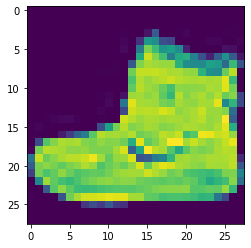

In [6]:
plt.imshow(x_train[0])

In [7]:
y_train[0]

9

In [8]:
classes[9]

'Ankle boot'

# Data Preprocessing

**TASK 3: Normalize the X train and X test data by dividing by the max value of the image arrays.**

In [9]:
x_train.max()

255

In [10]:
x_train = x_train/255

In [11]:
x_test = x_test/255

**Task 4: Reshape the X arrays to include a 4 dimension of the single channel. Similar to what we did for the numbers MNIST data set.**

In [12]:
x_train.shape

(60000, 28, 28)

In [13]:
x_train = x_train.reshape(x_train.shape[0],28,28,1)

In [14]:
x_test = x_test.reshape(10000,28,28,1)

**TASK 5: Convert the y_train and y_test values to be one-hot encoded for categorical analysis by Keras.**

In [15]:
from tensorflow.keras.utils import to_categorical

In [16]:
y_train

array([9, 0, 0, ..., 3, 0, 5], dtype=uint8)

In [17]:
y_cat_train = to_categorical(y_train)

In [18]:
y_cat_test = to_categorical(y_test)

# Modeling

## Create the model

**TASK 5: Use Keras to create a model consisting of at least the following layers (but feel free to experiment):**

* 2D Convolutional Layer, filters=28 and kernel_size=(3,3)
* Pooling Layer where pool_size = (2,2) strides=(1,1)

* Flatten Layer
* Dense Layer (128 Neurons, but feel free to play around with this value), RELU activation

* Final Dense Layer of 10 Neurons with a softmax activation

**Then compile the model with these parameters: loss='categorical_crossentropy', optimizer='rmsprop', metrics=['accuracy']**

In [19]:
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import Dense, Conv2D, MaxPool2D, Flatten, Dropout

##  Model Training 

**TASK 6: Train/Fit the model to the x_train set by using EarlyStop. Amount of epochs is up to you.**

In [20]:
model = Sequential()
model.add(Conv2D(filters=28, kernel_size=(3,3),input_shape=(28, 28, 1), activation='relu',))
model.add(MaxPool2D(pool_size=(2, 2),strides=(1, 1)))
model.add(Flatten())
model.add(Dense(256, activation='relu'))
model.add(Dropout(0.4))
model.add(Dense(10, activation='softmax'))

model.compile(loss='categorical_crossentropy',
              optimizer='rmsprop',
              metrics=['accuracy'])

In [21]:
from tensorflow.keras.callbacks import EarlyStopping
early_stop = EarlyStopping(monitor = "val_accuracy", patience = 3)

In [22]:
model.fit(x_train, y = y_cat_train, validation_data=(x_test,y_cat_test), batch_size = 32, epochs = 10, verbose = 1,
          callbacks = [early_stop])

Epoch 1/10
1875/1875 [==============================] - 162s 86ms/step - loss: 0.4090 - accuracy: 0.8578 - val_loss: 0.3254 - val_accuracy: 0.8894
Epoch 2/10
1875/1875 [==============================] - 142s 76ms/step - loss: 0.3044 - accuracy: 0.8955 - val_loss: 0.3186 - val_accuracy: 0.8902
Epoch 3/10
1875/1875 [==============================] - 136s 73ms/step - loss: 0.2856 - accuracy: 0.9031 - val_loss: 0.2963 - val_accuracy: 0.8977
Epoch 4/10
1875/1875 [==============================] - 132s 71ms/step - loss: 0.2751 - accuracy: 0.9067 - val_loss: 0.3127 - val_accuracy: 0.8998
Epoch 5/10
1875/1875 [==============================] - 136s 73ms/step - loss: 0.2730 - accuracy: 0.9079 - val_loss: 0.2968 - val_accuracy: 0.9034
Epoch 6/10
1875/1875 [==============================] - 132s 71ms/step - loss: 0.2712 - accuracy: 0.9092 - val_loss: 0.3495 - val_accuracy: 0.8985
Epoch 7/10
1875/1875 [==============================] - 147s 79ms/step - loss: 0.2736 - accuracy: 0.9090 - val_loss: 0

In [23]:
loss_df = pd.DataFrame(model.history.history)
loss_df.head()

,loss,accuracy,val_loss,val_accuracy
0,0.409003,0.857800,0.325367,0.8894
1,0.304440,0.895517,0.318590,0.8902
2,0.285645,0.903050,0.296264,0.8977
3,0.275108,0.906733,0.312667,0.8998
4,0.272993,0.907933,0.296800,0.9034


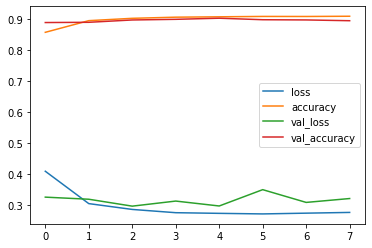

In [24]:
loss_df.plot();

**TASK 7: Plot values of metrics you used in your model.**

In [25]:
model.metrics_names

['loss', 'accuracy']

## Model Evaluation

**TASK 8: Show the accuracy,precision,recall,f1-score the model achieved on the x_test data set. Keep in mind, there are quite a few ways to do this, but we recommend following the same procedure we showed in the MNIST lecture.**

In [26]:
model.evaluate(x_test,y_cat_test)

313/313 [==============================] - 5s 16ms/step - loss: 0.3209 - accuracy: 0.8953


[0.320869117975235, 0.8952999711036682]

In [27]:
from sklearn.metrics import classification_report
predictions = model.predict(x_test)
predictions

313/313 [==============================] - 5s 16ms/step


array([[3.75424206e-05, 1.04123217e-06, 4.65243938e-05, ...,
        3.54591338e-03, 5.49376200e-05, 9.93932724e-01],
       [4.73661066e-09, 1.31142660e-20, 9.99999940e-01, ...,
        1.06489071e-18, 6.16573748e-15, 2.28158178e-19],
       [5.33274869e-10, 9.99999940e-01, 2.73149044e-13, ...,
        1.04140844e-13, 6.35766049e-12, 1.14196928e-13],
       ...,
       [2.27971526e-08, 3.79550790e-19, 3.94013294e-10, ...,
        1.01660928e-13, 9.99996126e-01, 5.54288798e-17],
       [1.42677854e-05, 9.98643458e-01, 2.79504206e-07, ...,
        9.87387150e-09, 4.48937129e-07, 9.58325419e-09],
       [5.54301478e-02, 4.19223495e-03, 6.05036765e-02, ...,
        2.11233363e-01, 6.81056231e-02, 8.15109685e-02]], dtype=float32)

In [28]:
preds=np.argmax(predictions,axis=1)
preds

array([9, 2, 1, ..., 8, 1, 5])

In [29]:
y_cat_test.shape

(10000, 10)

In [30]:
y_cat_test[0]

array([0., 0., 0., 0., 0., 0., 0., 0., 0., 1.], dtype=float32)

In [31]:
np.argmax(predictions[0])

9

In [32]:
y_test

array([9, 2, 1, ..., 8, 1, 5], dtype=uint8)

In [33]:
print(classification_report(y_test,preds))

              precision    recall  f1-score   support

           0       0.86      0.83      0.85      1000
           1       0.99      0.97      0.98      1000
           2       0.81      0.86      0.83      1000
           3       0.81      0.96      0.88      1000
           4       0.87      0.79      0.83      1000
           5       0.96      0.98      0.97      1000
           6       0.74      0.69      0.71      1000
           7       0.96      0.95      0.95      1000
           8       0.98      0.97      0.98      1000
           9       0.96      0.96      0.96      1000

    accuracy                           0.90     10000
   macro avg       0.90      0.90      0.89     10000
weighted avg       0.90      0.90      0.89     10000



## Prediction

In [36]:
samples=[x_test[19],x_test[15],x_test[12],x_test[14]]

In [37]:
img=x_test[19]
img.shape

(28, 28, 1)

In [38]:
type(img)

numpy.ndarray

In [39]:
resized_img=np.expand_dims(img, axis=0)
resized_img.shape

(1, 28, 28, 1)

In [41]:
model.predict(resized_img)

1/1 [==============================] - 0s 36ms/step


array([[9.1290069e-01, 2.1925571e-06, 5.0779421e-05, 1.4874721e-03,
        1.9741107e-07, 6.2161494e-09, 8.5554883e-02, 1.1064921e-09,
        3.6823521e-06, 1.2572821e-10]], dtype=float32)

In [42]:
np.argmax(model.predict(resized_img))

1/1 [==============================] - 0s 35ms/step


0

In [43]:
from tensorflow.keras.models import load_model

In [46]:
img=x_test[99]
img.shape

(28, 28, 1)

In [47]:
resized_img=np.expand_dims(img, axis=0)
resized_img.shape

(1, 28, 28, 1)

In [51]:
classes[2]

'Pullover'

# End of Assignment

___

<p style="text-align: center;"><img src="https://docs.google.com/uc?id=1lY0Uj5R04yMY3-ZppPWxqCr5pvBLYPnV" class="img-fluid" alt="CLRSWY"></p>

___